Install Convokit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# Install relevant libraries and dependencies
!pip install convokit
!pip install readability
!pip install hatesonar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 883 kB 12.8 MB/s 


In [5]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Importing the readability metric for scoring the comment/text complexity 
import readability 


sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)


#Hate Speech Detection
from hatesonar import Sonar

#Convokit Corpus
from convokit import Corpus, download

In [6]:
#Download the HATE-SPEECH corpus
corpus = Corpus(filename=download("diplomacy-corpus"))

In [7]:
#Quick Stats
corpus.print_summary_stats()

Number of Speakers: 83
Number of Utterances: 17289
Number of Conversations: 246


In [8]:
data = corpus.get_utterances_dataframe()
data.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.speaker_intention,meta.receiver_perception,meta.receiver,meta.absolute_message_index,meta.relative_message_index,meta.year,meta.game_score,meta.game_score_delta,meta.deception_quadrant,vectors
id,,,,,,,,,,,,,,,
Game1-italy-germany-0,74,Germany!\n\nJust the person I want to speak wi...,italy-Game1,None,Game1-italy-germany,Truth,Truth,germany-Game1,74,0,1901,3,0,Straightforward,[]
Game1-italy-germany-1,76,"You've whet my appetite, Italy. What's the sug...",germany-Game1,Game1-italy-germany-0,Game1-italy-germany,Truth,Truth,italy-Game1,76,1,1901,3,0,Straightforward,[]
Game1-italy-germany-2,86,👍,italy-Game1,Game1-italy-germany-1,Game1-italy-germany,Truth,Truth,germany-Game1,86,2,1901,3,0,Straightforward,[]
Game1-italy-germany-3,87,It seems like there are a lot of ways that cou...,germany-Game1,Game1-italy-germany-2,Game1-italy-germany,Truth,Truth,italy-Game1,87,3,1901,3,0,Straightforward,[]
Game1-italy-germany-4,89,"Yeah, I can’t say I’ve tried it and it works, ...",italy-Game1,Game1-italy-germany-3,Game1-italy-germany,Truth,None,germany-Game1,89,4,1901,3,0,Unknown,[]


Visualization Plots

1. Perform and plot the analysis of variables that have been given in the paper. 
2. Reproduce them
3. Do study of your own - Follow the plots

In [11]:
# Compute readability metrics of the data 
data['readability'] = readability.getmeasures(data['text'], lang='en')['readability grades']['Kincaid']

# Compute average Kincaid Grade level
print(data['readability'].mean())

# Clean the data. Though the metric is not of much use 

6.148031190062359


In [15]:
data['readability'].value_counts()

6.148031    17289
Name: readability, dtype: int64

In [ ]:
data.iloc[25, ]

timestamp                                                                    341
text                           How are things going with England? I think tha...
speaker                                                              italy-Game1
reply_to                                                  Game1-italy-germany-24
conversation_id                                              Game1-italy-germany
meta.speaker_intention                                                     Truth
meta.receiver_perception                                                   Truth
meta.receiver                                                      germany-Game1
meta.absolute_message_index                                                  341
meta.relative_message_index                                                   25
meta.year                                                                   1901
meta.game_score                                                                4
meta.game_score_delta       

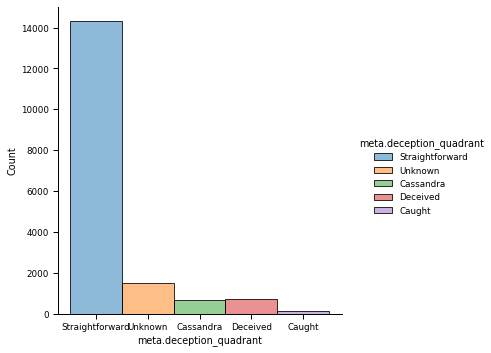

In [ ]:
#Study the distribution of deception quadrant
sns.displot(data.dropna(axis=0, how='all'), x='meta.deception_quadrant', hue='meta.deception_quadrant')
plt.show()

In [ ]:
# EDA for all games
# Message Count
print(f"Message Count - {data.shape[0]}")

# Actual Lie Count
data_act_lie = data[(data['meta.speaker_intention']=='Lie')]
print(f"Actual Lie Count - {data_act_lie.shape[0]}")

#Suspected Lie Count
data_sus = data[data['meta.speaker_intention'] == 'Truth']
data_sus_lie = data_sus[data_sus['meta.receiver_perception'] == 'Lie']
print(f"Suspected Lie Count - {data_sus_lie.shape[0]}")

#Average Word Count
data_length=data['text'].apply(lambda sent : len(sent))
print(f"Average Word Count - {(data_length.values.sum())/len(data):.2f}")

Message Count - 17289
Actual Lie Count - 887
Suspected Lie Count - 667
Average Word Count - 105.08


In [ ]:
#A lie-lie statement
data_caught = data_act_lie[data_act_lie['meta.receiver_perception']=='Lie']
data_caught['text'][0]

'I give you my word: I don’t know what England is going to do and I haven’t asked.'

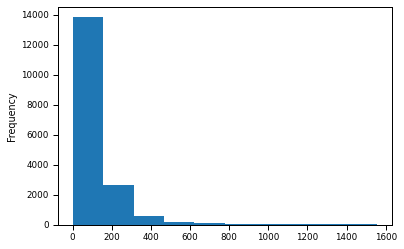

In [ ]:
# Distribution of Word Count per message
data_length.plot.hist(grid=False)

<Figure size 720x1080 with 0 Axes>

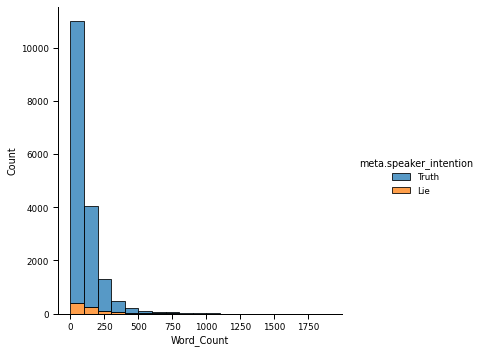

In [ ]:
#Word Count of Text by Speaker's perception
data['Word_Count'] = data['text'].apply(lambda sent : len(sent))
plt.figure(figsize=(10, 15))
sns.displot(data.dropna(axis=0, how='all'), x='Word_Count', hue='meta.speaker_intention', multiple='stack', bins=[i for i in range(0, 2000, 100)])
plt.show()

<Figure size 720x1080 with 0 Axes>

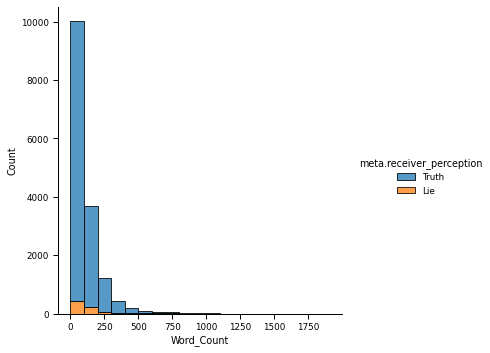

In [ ]:
#Word Count of Text by Receiver's perception
data['Word_Count'] = data['text'].apply(lambda sent : len(sent))
plt.figure(figsize=(10, 15))
sns.displot(data.dropna(axis=0, how='all'), x='Word_Count', hue='meta.receiver_perception', multiple='stack', bins=[i for i in range(0, 2000, 100)])
plt.show()